<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/12-2_%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC_%ED%95%9C%EA%B8%80%20%ED%98%95%ED%83%9C%EC%86%8C%20%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 절차

- 데이터 수집(코퍼스 수집, 말뭉치 수집)
- 텍스트 정제(정규식 적용)
- 분절(형태소 분석기 작동)
- 사전 생성(단어장 생성)
- 단어 임베딩(텍스트의 수치화)

# 코퍼스(말뭉치) 수집

- test.txt 파일 제공
- 종류
  - 한 개의 언어로만 구성된 데이터 : 단일 언어 코퍼스
    - test.txt
  - 2개 언어로 구성된 데이터      : 이중 언어 코퍼스
  - 2개 이상 언어로 구성된 데이터  : 다중 언어 코퍼스
  - 병렬 언어 코퍼스(여러 개의 언어가 쌍으로 구성된 경우)

# 정제
- 전각 문자(특수문자 등) 제거
- 영어 대소문자 -> 소문자로 통일
- 정규식 처리 정제과정 진행

# 분절 (형태소 분석기 작동)
- 분절을 수행하기 위해서는 형태소 분석기 설치가 필요
- 리눅스 환경에서 설치 (윈도우 환경에서 설치는 아주 까다롭다!(순서중요))
  - 코랩에서 수행시, 런타임 종료되면 모두 삭제된다 -> 다시 설치가 필요
- 영어권
  - nltk
- 한국어
  - koNlpy + 분석기(mecab)

In [ ]:
import nltk
# 한글에서 100% 성능을 못 낸다(한글에 적합하지 않다)는 의미이지 안된다는 뜻은 아님

In [ ]:
# konlpy 설치
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 3.8MB 44.8MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
'''
# jdk 설치
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3
'''
!java -version

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [ ]:
'''
셀스크립트로 설치하는 방법
! bash <(curl -s https://.../mecab.sh)
'''
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [126 kB]
Get:14 http://archiv

In [ ]:
import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0   503k      0  0:00:02  0:00:02 --:--:-- 1250k
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.9.1/aclocal.m4
mecab-0.996-ko-0.9.1/mecabrc.in
mecab-0.996-ko-0.9.1/INSTALL
mecab-0.996-ko-0.9.1/AUTHORS
mecab-0.996-ko-0.9.1/example/
mecab-0.996-ko-0.9.1/example/example_lattice.c
mecab-0.996-ko-0.9.1/

In [ ]:
import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 46.3M  100 46.3M    0     0  8307k      0  0:00:05  0:00:05 --:--:-- 10.2M
mecab-ko-dic-2.0.1-20150920/
mecab-ko-dic-2.0.1-20150920/configure.ac
mecab-ko-dic-2.0.1-20150920/Person-actor.csv
mecab-ko-dic-2.0.1-20150920/IC.csv
mecab-ko-dic-2.0.1-20150920/model.def
mecab-ko-dic-2.0.1-20150920/user-dic/
mecab-ko-dic-2.0.1-20150920/user-dic/place.csv
mecab-ko-dic-2.0.1-20150920/user-dic/README.md
mecab-ko-dic-2.0.1-20150920/user-dic/person.csv
mecab-ko-dic-2.0.1-20150920/user-dic/nnp.csv
mecab-ko-dic-2.0.1-20150920/Place.csv
mecab-ko-dic-2.0.1-20150920/rewrite.def
mecab-ko-dic-2.0.1-20150920/tools/
mecab-ko-dic-2.0.1-20150920/tools/add-userdic.sh
mecab-ko-dic-2.0.1-20150920/tools/mecab-bestn.sh
mecab-ko-dic-2.0.1-20150920/tools/convert_for_using_store.sh

In [ ]:
# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

Cloning into 'mecab-python-0.996'...
remote: Counting objects: 17, done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
copying MeCab.py -> build/lib.linux-x86_64-3.6
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.6m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.6/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.6/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc

## Mecab

- 일본어 형태소 분석용 오픈소스로 개발된 모듈
- 한국어에 맞게 wrapping해서 제공
- 한글 분절용  형태소 분석기로 가장 많이 사용
- his
  - 은전한닢이라는 내용을 처음으로 적용(Mecan Fork 프로젝트) 
  - koLlpy에 포함되었다

- 설치 : 후에는 번거로우니 코드를 한 칸에 몰아서 설치
  - konlpy 설치
  - open jdk 설치
  - Mecab 소스 다운로드, 컴파일
  - Mecab-ko 모듈 설치
  - Mecab-ko-dic 모듈 설치
  - Mecab 설치

In [ ]:
# nltk 적용
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

with open('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/test.txt', 'r') as f:
  for line  in f:
    # 문자 획득
    msg = line.strip()
    if msg:
      # 한 줄상에서 존재하는 여러 개의 문장을 추출
      # 문장의 끝을 .을 기준으로 판단
      # .을 쓰지 않고 문장을 끝내는 경우가 많은데, 이 경우 적합하지 않다
      # 문장은 문단을 구성하고, 형태소 분석을 하기 위해 단위를 나눌 때는 문장 단위가 의미론적으로는 적합
      sentences =  sent_tokenize( msg )
      for s in sentences:
        if s : print( s )

초기 인공지능 연구에 대한 대표적인 정의는 다트머스 회의에서 존 매카시가 제안한 것으로 "기계를 인간 행동의 지식에서와 같이 행동하게 만드는 것"이다 그러나 이 정의는 범용인공지능(AGI, 강한 인공지능)에 대한 고려를 하지 못한 것 같다.
인공지능의 또다른 정의는 인공적인 장치들이 가지는 지능이다.
거의 대부분 정의들이 인간처럼 사고하는 시스템, 인간처럼 행동하는 시스템, 이성적으로 사고하는 시스템 그리고 이성적으로 행동하는 시스템이라는 4개의 분류로 분류된다.
신종 코로나바이러스 감염증(코로나19) 여파로 3주 넘게 영업을 못 하고 있는 PC방 점주들이 다음 주 거리로 나온다.
거리 집회의 호소 대상은 국회다.
PC방은 ‘코로나19 고위험시설’로 지정돼있는데 업계는 이를 해제해달라고 요구하고 있다.


- 문장단위 작업이 녹록치 않다
- 형태소 단위로 쪼개서 진행

In [ ]:
# 영어 쪽 형태소 처리
import spacy

In [ ]:
# 재료
enc_txt = 'Founded in July 2003 by engineers Martin Eberhard and Marc Tarpenning as Tesla Motors, the company’s name is a tribute to inventor and electrical engineer Nikola Tesla. The next three employees were Ian Wright, Elon Musk, and J. B. Straubel, all of whom are named as co-founders of the company.'
enc_txt

'Founded in July 2003 by engineers Martin Eberhard and Marc Tarpenning as Tesla Motors, the company’s name is a tribute to inventor and electrical engineer Nikola Tesla. The next three employees were Ian Wright, Elon Musk, and J. B. Straubel, all of whom are named as co-founders of the company.'

In [ ]:
spacy_en = spacy.load('en')

In [ ]:
# 말뭉치를 덩어리째 묶어서 토큰 단위로 분해 -> 리스트로 리턴
print( [ token for token in spacy_en.tokenizer( enc_txt ) ] )

[Founded, in, July, 2003, by, engineers, Martin, Eberhard, and, Marc, Tarpenning, as, Tesla, Motors, ,, the, company, ’s, name, is, a, tribute, to, inventor, and, electrical, engineer, Nikola, Tesla, ., The, next, three, employees, were, Ian, Wright, ,, Elon, Musk, ,, and, J., B., Straubel, ,, all, of, whom, are, named, as, co, -, founders, of, the, company, .]


## Mecab을 이용한 한글 분절

- 한글을 띄어쓰기 기준으로 하면, 토큰화 처리 시 의미가 불명확해 진다
  - 이런 이유로 언어적인 특징도 고려하여 형태소 단위로 진행

In [ ]:
from konlpy.tag import Mecab

In [ ]:
# 재료
ko_sentence = '오늘 점심 무엇으로 먹을까'
ko_sentence

'오늘 점심 무엇으로 먹을까'

In [ ]:
# 형태소 분석기
tokenizer = Mecab()
# 형태소 처리
tokenizer.morphs( ko_sentence )

['오늘', '점심', '무엇', '으로', '먹', '을까']

- [성분표](http://bit.ly/2StqivH)(형태소 분석기별 성분에 대한 설명표)

In [ ]:
# 형태소 + 요소(tag명) 같이 추출
# 품사 태깅을 수행했다 -> pos()
# 형태소의 성분을 같이 추출
tokens = tokenizer.pos( ko_sentence )
tokens

[('오늘', 'MAG'),
 ('점심', 'NNG'),
 ('무엇', 'NP'),
 ('으로', 'JKB'),
 ('먹', 'VV'),
 ('을까', 'EC')]

In [ ]:
# 성분 정보 추출
tokenizer.tagset.get( 'MAG' )

'일반 부사'

In [ ]:
# tag -> 'MAG' 이렇게 보면 의미를 모르니까 한글로 번역해서 보여준다
[ (token, tokenizer.tagset.get( tag ) ) for token, tag in tokens ]

[('오늘', '일반 부사'),
 ('점심', '일반 명사'),
 ('무엇', '대명사'),
 ('으로', '부사격 조사'),
 ('먹', '동사'),
 ('을까', '연결 어미')]

## 영어 분절 샘플

In [ ]:
nltk.download('perluniprops')

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.


True

In [ ]:
from nltk.tokenize.moses import MosesTokenizer

In [ ]:
# 영어 문자 샘플
en_str = '''Trump was born and raised in Queens, a borough of New York City. He attended Fordham University for two years and received a bachelor's degree in economics from the Wharton School of the University of Pennsylvania.'''
en_str

"Trump was born and raised in Queens, a borough of New York City. He attended Fordham University for two years and received a bachelor's degree in economics from the Wharton School of the University of Pennsylvania."

In [ ]:
# 추가 다운로후 생성
nltk.download('nonbreaking_prefixes')
mt = MosesTokenizer()

[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.


In [ ]:
mt.tokenize( en_str )

['Trump',
 'was',
 'born',
 'and',
 'raised',
 'in',
 'Queens',
 ',',
 'a',
 'borough',
 'of',
 'New',
 'York',
 'City',
 '.',
 'He',
 'attended',
 'Fordham',
 'University',
 'for',
 'two',
 'years',
 'and',
 'received',
 'a',
 'bachelor',
 '&apos;s',
 'degree',
 'in',
 'economics',
 'from',
 'the',
 'Wharton',
 'School',
 'of',
 'the',
 'University',
 'of',
 'Pennsylvania',
 '.']

# 사전 생성
- 단어장, 보케 등

- 생성방법
  - 중복되지 않은 토큰(형태소)을 준비
  - 해당 토큰에 고유한 번호를 부여 or 빈도를 부여
  - 토큰을 이용해서 만들어진 사전을 이용해, 문장을 수치로 표현 : 단어 임베딩
  - 단어 임베딩 데이터를 이용하여 RNN으로 진입하게 된다


- 단어장 만들기
  - 재료 : /content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/rating.txt
  - 내용 : 
    - 네이버 영화에 대한 감성 데이터(리뷰)
    - 아이디, 내용, 평가(1:긍정, 0:부정)
    - 구분자 :  \t
    - 1번 라인은 컬럼명이므로 데이터 읽을 때 제외

In [ ]:
# 1. 형태소 분석기 준비
from konlpy.tag import Mecab
tokenizer = Mecab()

In [ ]:
# 2. 데이터를 읽어서, 처리(?)
with open('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/rating.txt') as f:
  # splitlines() : 다 읽어서 라인별로 분할해서 리스트로 반환
  # [1:] : 컬럼라인을 제거하고 나머지 모두 획득
  raw = f.read().splitlines()[1:]
  print( len( raw ) )
  print( raw[0] )
  pass

18597
8112052	어릴때보고 지금다시봐도 재밌어요ㅋㅋ	1


In [ ]:
with open('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/rating.txt') as f:  
  raw = f.read().splitlines()[1:]
  # 샘플링 1개의 리뷰만 처리해서 원하는 형태를 구성 -> 전체 적용, 부분 적용
  # 리뷰와 긍부정만 취한다면
  x = raw[0].split('\t')[1:]
  print( type(raw[0]),  x   )
  # 형태소 처리 => x[0]
  print( tokenizer.morphs( x[0] ) )

<class 'str'> ['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ']


In [ ]:
with open('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/rating.txt') as f:  
  raw = f.read().splitlines()[1:]
  # 산출물 : [ ( ['어릴', '때',...], 1 ), (), (),    ]
  # 1. 문자열에서 문장과 평점을 분리
  #    문자열이 여러 개 존재 => 18597의 데이터를 한개씩 접근해서 
  #    ex) ['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']에 추출해야 한다
  data = list( map( lambda x:x.split('\t')[1:] , raw ) )
  # 2. 최종형태
  # data = list( map( lambda x:( tokenizer.morphs( x[0] ) , int(x[1]) ), data) )
  def chgX( x ):
    if len(x)>1: # 정상 데이터    
      return ( tokenizer.morphs( x[0] ) , int(x[1].strip()) )
    else: # 비정상 데이터 -> 제거, 보정 결정
      print( x )
      return ( tokenizer.morphs( x[0] ) , 1 )
  data = list( map( chgX, data) )
  # data로 추출하시오  

data[:2]

['리페이스 출연작이라 보게 되었지만 참 좋은 영화군요. 잘 만들었어요. 왜 이제 봤나 싶을 정도, 에이미 아담스 매력 터짐. 리페이스도 멋있어']


[(['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], 1),
 (['디자인',
   '을',
   '배우',
   '는',
   '학생',
   '으로',
   ',',
   '외국',
   '디자이너',
   '와',
   '그',
   '들',
   '이',
   '일군',
   '전통',
   '을',
   '통해',
   '발전',
   '해',
   '가',
   '는',
   '문화',
   '산업',
   '이',
   '부러웠',
   '는데',
   '.',
   '사실',
   '우리',
   '나라',
   '에서',
   '도',
   '그',
   '어려운',
   '시절',
   '에',
   '끝',
   '까지',
   '열정',
   '을',
   '지킨',
   '노라노',
   '같',
   '은',
   '전통',
   '이',
   '있',
   '어',
   '저',
   '와',
   '같',
   '은',
   '사람',
   '들',
   '이',
   '꿈',
   '을',
   '꾸',
   '고',
   '이뤄나갈',
   '수',
   '있',
   '다는',
   '것',
   '에',
   '감사',
   '합니다',
   '.'],
  1)]

In [ ]:
# 현재까지 데이터 
len(data), data[0]

(18597, (['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], 1))

In [ ]:
# 사전화시키기 위해서 샘플데이터 앞에서 5번부터 10개, 뒤에서 10개 준비
sample_data = data[5:5+10] + data[-10:]
sample_data[0], sample_data[-1]

((['사랑',
   '을',
   '해',
   '본',
   '사람',
   '이',
   '라면',
   '처음',
   '부터',
   '끝',
   '까지',
   '웃',
   '을',
   '수',
   '있',
   '는',
   '영화'],
  1),
 (['리페이스',
   '출연',
   '작',
   '이',
   '라',
   '보',
   '게',
   '되',
   '었',
   '지만',
   '참',
   '좋',
   '은',
   '영화',
   '군요',
   '.',
   '잘',
   '만들',
   '었',
   '어요',
   '.',
   '왜',
   '이제',
   '봤',
   '나',
   '싶',
   '을',
   '정도',
   ',',
   '에',
   '이미',
   '아담스',
   '매력',
   '터짐',
   '.',
   '리페이스',
   '도',
   '멋있',
   '어'],
  1))

In [ ]:
# 리스트 구성원들끼리 묶어서 표현
# 구성원들끼지 묶어서 데이터를 구성한다!
# 원본 [ ( ['어릴', '때',...], 1 ), (), (),    ] <=  sample_data
# 변경 [ ([],[],[],... ),( 1,1,0,0,1,0,,...)   ]
# zip( 객체의 실제주소를 입력(함수가 요청해서 포인터 형태로 제공) )
tmp = list( zip( *sample_data ) )
tmp

[(['사랑',
   '을',
   '해',
   '본',
   '사람',
   '이',
   '라면',
   '처음',
   '부터',
   '끝',
   '까지',
   '웃',
   '을',
   '수',
   '있',
   '는',
   '영화'],
  ['완전', '감동', '입니다', '다시', '봐도', '감동'],
  ['개',
   '들',
   '의',
   '전쟁',
   '2',
   '나오',
   '나요',
   '?',
   '나오',
   '면',
   '1',
   '빠',
   '로',
   '보',
   '고',
   '싶',
   '음'],
  ['굿'],
  ['바보', '가', '아니', '라', '병', '쉰', '인', '듯'],
  ['내',
   '나이',
   '와',
   '같',
   '은',
   '영화',
   '를',
   '지금',
   '본',
   '나',
   '는',
   '감동',
   '적',
   '이',
   '다',
   '.',
   '.',
   '하지만',
   '훗날',
   '다시',
   '보',
   '면',
   '대사',
   '하나하나',
   '그',
   '감정',
   '을',
   '완벽',
   '하',
   '게',
   '이해',
   '할',
   '것',
   '만',
   '같',
   '다',
   '.',
   '..'],
  ['재밌', '다'],
  ['고질라', '니무', '귀엽', '다', '능', 'ㅋㅋ'],
  ['영화',
   '의',
   '오페라',
   '화',
   '라고',
   '해야',
   '할',
   '작품',
   '.',
   '극단',
   '적',
   '평갈',
   '림',
   '은',
   '어쩔',
   '수',
   '없',
   '는',
   '듯',
   '.'],
  ['3', '도', '반전', '좋', '았', '제', '^^'],
  ['애초',
   '에',
   '부자지간',
   '의

In [ ]:
# 사전 처리
vocab = dict() # { 키(:토큰):값(:인덱스) }

# torchtext를 위해서 사전화 처리할때 보정사항!
# 단어장(사전)에 없는 형태소가 있는 경우 : unknown ->  torchtext에서는 <unk> 표시, 값 0으로 세팅 
# 학습 효율상 문장의 길이를 동일하게 맞출 수 있다 => 짧은 문장의 경우 크기를 동일하게 맞추기 위해서 
# 보정 => 패딩을 이용하여 특정 값으로 채운다 => <pad>의 값은 1로 세팅

vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [ ]:
# 사전화 대상 형태소 데이터
# ( 형태소s, 긍정/부정s )
len( tmp ), len( tmp[0] )

(2, 20)

In [ ]:
# 형태소로 쪼개져 있는 20개의 문장을 돌면서, 사전 작업을 개시
# 한번도 만나지 않은 새로운 형태소라면 vocab에 추가
# vocab['신규형태소'] = 2 ~  자동으로 증가되는 값을 부여
for sentence in tmp[0]:
  # print( sentence )
  # 사전 구현 : 형태소를 하나씩 빼서 사전에 추가한다(단, 사전에 추가되어 있지 않다면)
  # 형태소를 하나씩 뺀다
  for token in sentence:
    if not token in vocab: # 기본 사전에 해당 토큰이 키로 존재하지 않으면 -> 최초
      vocab.setdefault( token, len(vocab) )
  # break

# 만들어진 모든 사전상의 형태소의 개수
# 총 리뷰가 아닌, 샘플링 10개 대한 사전, 그 안에 등록된 형태소의 개수
len( vocab )

188

In [ ]:
vocab

{'!': 171,
 ',': 181,
 '.': 58,
 '..': 72,
 '1': 32,
 '2': 27,
 '3': 89,
 '<pad>': 1,
 '<unk>': 0,
 '?': 30,
 '^^': 95,
 '~': 154,
 '♡♡': 161,
 'ㅋㅋ': 78,
 '가': 41,
 '감동': 19,
 '감정': 64,
 '같': 51,
 '개': 23,
 '것': 70,
 '게': 67,
 '고': 36,
 '고달픔': 165,
 '고질라': 74,
 '공감': 108,
 '과': 164,
 '관객': 128,
 '군요': 177,
 '굿': 39,
 '귀엽': 76,
 '그': 63,
 '그러': 132,
 '그러나': 103,
 '그리고': 138,
 '극단': 84,
 '기': 111,
 '까지': 12,
 '끝': 11,
 '나': 55,
 '나오': 28,
 '나요': 29,
 '나이': 49,
 '남': 152,
 '낮': 113,
 '내': 48,
 '너무': 135,
 '네요': 153,
 '는': 16,
 '는구나': 143,
 '능': 77,
 '니무': 75,
 '다': 57,
 '다시': 21,
 '단지': 107,
 '대사': 61,
 '대해': 100,
 '도': 90,
 '되': 174,
 '된': 157,
 '들': 24,
 '듯': 47,
 '따뜻': 166,
 '라': 43,
 '라고': 81,
 '라면': 8,
 '로': 34,
 '롱리': 139,
 '를': 53,
 '리페이스': 172,
 '림': 86,
 '마지막': 144,
 '만': 71,
 '만들': 178,
 '망': 104,
 '매력': 184,
 '멋있': 186,
 '면': 31,
 '모르': 101,
 '못': 102,
 '못하': 110,
 '미호': 169,
 '바보': 40,
 '반전': 91,
 '별점': 133,
 '병': 44,
 '보': 35,
 '본': 5,
 '봐도': 22,
 '봤': 137,
 '부자지간': 98,
 '부터'

In [ ]:
print( vocab )

{'<unk>': 0, '<pad>': 1, '사랑': 2, '을': 3, '해': 4, '본': 5, '사람': 6, '이': 7, '라면': 8, '처음': 9, '부터': 10, '끝': 11, '까지': 12, '웃': 13, '수': 14, '있': 15, '는': 16, '영화': 17, '완전': 18, '감동': 19, '입니다': 20, '다시': 21, '봐도': 22, '개': 23, '들': 24, '의': 25, '전쟁': 26, '2': 27, '나오': 28, '나요': 29, '?': 30, '면': 31, '1': 32, '빠': 33, '로': 34, '보': 35, '고': 36, '싶': 37, '음': 38, '굿': 39, '바보': 40, '가': 41, '아니': 42, '라': 43, '병': 44, '쉰': 45, '인': 46, '듯': 47, '내': 48, '나이': 49, '와': 50, '같': 51, '은': 52, '를': 53, '지금': 54, '나': 55, '적': 56, '다': 57, '.': 58, '하지만': 59, '훗날': 60, '대사': 61, '하나하나': 62, '그': 63, '감정': 64, '완벽': 65, '하': 66, '게': 67, '이해': 68, '할': 69, '것': 70, '만': 71, '..': 72, '재밌': 73, '고질라': 74, '니무': 75, '귀엽': 76, '능': 77, 'ㅋㅋ': 78, '오페라': 79, '화': 80, '라고': 81, '해야': 82, '작품': 83, '극단': 84, '평갈': 85, '림': 86, '어쩔': 87, '없': 88, '3': 89, '도': 90, '반전': 91, '좋': 92, '았': 93, '제': 94, '^^': 95, '애초': 96, '에': 97, '부자지간': 98, '정': 99, '대해': 100, '모르': 101, '못': 102, '그러나': 103, '망': 1

In [ ]:
# 딕셔너리 안에 특정 키가 존재하는가?
# 값 조사(키값 조사)
'<pad>' in vocab, '<pad2>' in vocab

(True, False)

# 단어 임베딩 기법

## 일반 방법

- 자연어 데이터는 학습을 하기 위해, 수치로 표현되어야 한다
  - 이 작업을 하기위해서, 사전을 생성하였다
  - 사전을 보고 문장을 수치로 표현해야 한다

In [ ]:
# 단어 임베딩 함수
# voca : 사전
# sent : 문장
# 문장 1개에 대한 수치화(단어 임베딩) 작업
def numericalize( voca, sent ):
  tmp = list()  
  for token in sent:
    # 형태소에 해당되는 수치를 뽑아서 tmp에 모아둔다
    if token in voca:
      tmp.append( voca.get( token ) )
      # tmp.append( voca[token] )
    # 만약 없는 단어는 <unk>에 대응하는 값을 부여
    else:
      tmp.append( voca.get( '<unk>' ) )
  return tmp

# 1개의 문장으로 샘플링(단어 임베딩)
numericalize( vocab,  sample_data[0][0] )
# 문장 전체로 처리해서 저장
# numericalize_data = [ ( 수치화된리스트, 긍정/부정 ) ]
numericalize_data = [ ( numericalize( vocab,  sent ), label  )
                      for sent, label in sample_data ]

In [ ]:
print( numericalize_data[0] )

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 14, 15, 16, 17], 1)


In [ ]:
for sent, label in sample_data:
  print( sent )
  print( label )
  break

['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화']
1


In [ ]:
sample_data[0][0]

['사랑',
 '을',
 '해',
 '본',
 '사람',
 '이',
 '라면',
 '처음',
 '부터',
 '끝',
 '까지',
 '웃',
 '을',
 '수',
 '있',
 '는',
 '영화']

## 단어 주머니(Bag of Words)


- 고전 기법
- 단어의 출현빈도로 기록
- 문장, 형태소를 2D 행렬로 표현
- 구성요소 
  - 행 : 문장 1개 -> 문장의 크기를 동일해게 맞추겠다!
  - 열 : 각 문장에서 사용된 고유 단어의 빈도(개수가 표현)

In [ ]:
# 토치 텍스트를 이용하여 데이터를 최종 세팅(API를 이용한다)
import torch
# 빈도 계산을 위해
from collections import Counter

- 말뭉치 : rating.txt => data
- sample_data : data에서 20개 샘플링 했음
- 사전 생성
- numericalize_data : 사전을 이용하여 문장을 수치로 변환한 단어 임베딩 데이터

In [ ]:
# 행렬 구성을 위한 성분 크기 획득
# 행 : 1차원 => 데이터의 개수 => 20개
num_docs = len( numericalize_data )
num_docs

20

In [ ]:
# 열
# 최대문장크기 : 작은 문장의 빈 부분은 padding으로 표현, 확장성이 부족, 문장의 크기가 가변일때 대응 X
# 사전의 크기 : 어떤 문장이든 표현할 수 있다. -> 빈도로 표현
num_vocab = len( vocab )
num_vocab

188

In [ ]:
# 문장을 사전 대비 빈도로 표현한다면 -> 긍정(1) 혹은 부정(0)
# 행렬의 크기 ( 20,188 )
# 영행렬
term_matrix = torch.zeros( num_docs, num_vocab )
term_matrix, term_matrix.size()
# 개별 데이터가 행렬화되서 term_matrix에 각자 자리에 세팅된다(다음 작업)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), torch.Size([20, 188]))

In [ ]:
# 문장 한개에 대해서 빈도 계산:
for sent, label in numericalize_data:
  # print(sent)
  # print(label)
  # print( Counter( sent ) )
  # 키과 값을 묶어서 리스트로 리턴
  # (수치, 빈도), .....
  # print( list( Counter( sent ).items() ) )
  # (수치, 수치, 수치,...), (빈도, 빈도, 빈도,...)
  # zip()의 결과물을 직접 분해해서 맴버 수대로 변수로 받을 수 있다
  tokens, cnts = zip( *list( Counter( sent ).items() ) )
  print( tokens  )
  print( cnts  )
  break
  

(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
(1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


In [ ]:
# term_matrix에 1개의 데이터마다 구성하면 행렬로 세팅
'''
# term_matrix 특정 위치에 데이터를 세팅하는 코드
term_matrix[ 0 , 표현(tokens, 데이터가 세팅될 컬럼의 인덱스) ] 
                                    = 표현(무엇이 데이터로 세팅 -> 빈도, cnts) 
'''


'\n# term_matrix 특정 위치에 데이터를 세팅하는 코드\nterm_matrix[ 0 , 표현(tokens, 데이터가 세팅될 컬럼의 인덱스) ] \n                                    = 표현(무엇이 데이터로 세팅->빈도, cnts) \n'

In [ ]:
# enumerate() => 인덱스가 순차로 발생하고, 이 값을 블럭 내에서 사용한다면 사용
# enumerate() => 인덱스, 값
for idx, (sent, label) in enumerate( numericalize_data ) :
  tokens, cnts  = zip( *list( Counter( sent ).items() ) )
  # 카피될 포지션을 리스트로 주로 표현했는데, 여기서는 텐서로도 표현이 가능하다
  # 기법적으로는 numpy의 펜시인덱싱, pandas의 iloc과 기법 동일
  # 문법 : 변수(배열, 데이터프레임, 텐서)[ 인덱스나열, 인덱스나열 ]
  term_matrix[ idx, torch.LongTensor(tokens) ] = torch.Tensor( cnts )
  # break
term_matrix

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

In [ ]:
term_matrix[-1]

tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# 데이터가 엄청 클 것까지 고려한다면 Long -> 전체 인덱스는 다 커버 가능함
torch.LongTensor(tokens)

tensor([172, 173, 105,   7,  43,  35,  67, 174, 129, 175, 176,  92,  52,  17,
        177,  58, 158, 178, 130, 131, 179, 137,  55,  37,   3, 180, 181,  97,
        182, 183, 184, 185,  90, 186, 187])

- 문제점
  - 말뭉치가 많으면 -> 문장도 많아질것이고 -> 토큰도 많아지고 -> 피처도 많아지고 -> 백터가 커진다
  - 힙스의 법칙, 로그함수처럼 커진다

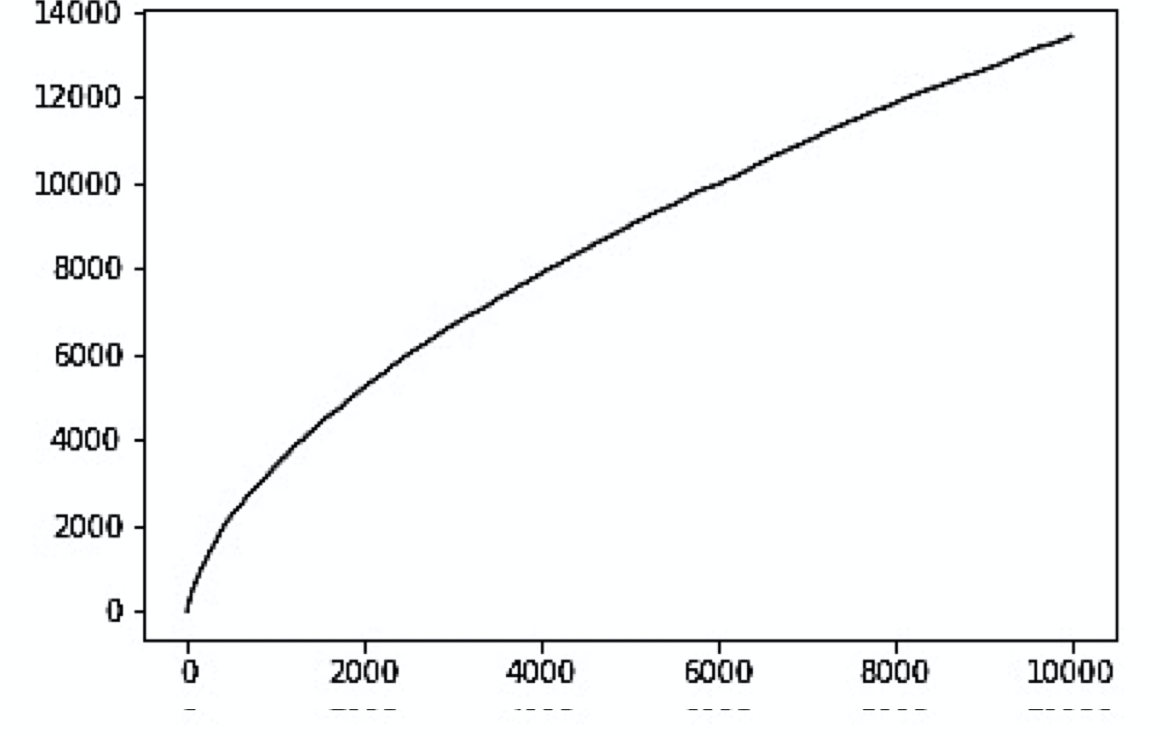

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn2/힙스의법칙.png', width='300')

# 해결방안 -> 백터가 커지면, 0이 많아지고, 데이터가 희소해져서 학습 성과가 저하된다
# 0이 많으면 오차역전파(y -> x 가기 위해서, W/b를 조정-> 미분을 통해서 처리)를 통한 최적화시도가 실패하게 된다 
#    -> 학습 성과가 저하된다 -> 단어 백터의 밀집화 처리가 필요하다
# 문장크기를 같은 크기로 하여서 0을 줄이는 방안 등장 -> 문장의 최대 길이 기준으로 패딩을 처리하여 데이터을 최소로 구성한다

## padding 처리
- 최대 문장 길이에 맞춰서 크기를 동일하게 처리
- 임의로 맞춰야 할 값은 
  - \<pad\>로 세팅, 값은 1

In [ ]:
numericalize_data[0]

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 14, 15, 16, 17], 1)

In [ ]:
# 훈련용 데이터 중에서 최대 문장길이를 가진 문장의 최대길이값 획득
max_len = max( [ len(문장) for 문장, _ in numericalize_data ] )
max_len

39

In [ ]:
for sent, _ in numericalize_data :
  # 현재 문장 길이 획득
  c_len = len( sent )
  # 비교
  if c_len < max_len:
    # 보정의 대상이 된다
    # sent = sent + [1] * (max_len-c_len)
    sent += [1] * (max_len-c_len)
  print( sent )
  break

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 14, 15, 16, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# expand()
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 14, 15, 16, 17]+[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 3,
 14,
 15,
 16,
 17,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

#  파이토치의 토치텍스트 모듈을 이용하여 처리

- torchtext
- 자연어처리, 텍스트를 이용한 머신러닝/딥러닝
- 데이터 전처리 기능제공
- 분야
  - x:코퍼스, y:클래스 => 텍스트분류, 감성(정) 분석
  - x:코퍼스, y:-　 　 => 언어적 모델 구성
  - x:코퍼스, y:코퍼스 => 기계번역, 문서요약,QA등

In [ ]:
# 토치 텍스트를 이용하면 간략하게 전처리 구성을 할수 있다

In [ ]:
# 1. 모듈 및 형태소 분석기 가져오기
from torchtext.data import Field
from konlpy.tag import Mecab

In [ ]:
# 2. 코퍼스를 가져와서 사전작업(형태소 분절 처리), 수치화(임베딩).. 작업을 API를 이용하여 처리
# 2-1. 데이터의 컬럼 수대로 Field를 정의한다
'''
중요 파라미터
sequential    : 이 필드에서 다루는 데이터가 시퀀스 데이터인가?, 문장 => 시퀀스를 가진다
use_vocab     : 사전을 사용할것인가? True => 내부적으로 사전을 만든다(형태소로 분절, 인덱스 사전 구성)
tokenize      : 사전을 사용한다면 => 형태소 분석기가 필요하다 => 제공(한국어 Mecab, ....)
lower         : 소문자 처리, 한글은 해당 상황 없음, 그냥 표현했음
batch_first   : True => [ batch, h, w ] 형태의 배치상황으로 데이터의 첫번째 Dimension이 개수이다
preprocessing : 전처리, 리뷰에서 필요하면 함수로 배치하면 된다.
is_target     : 타겟 데이터가 맞는가? 정답용 데이터인가?
'''
# 구색 맞추기용. 데이터에 필드가 존재하는데 사용은 안 할 것이다 
# 그러나 컬럼으로는 존재하므로 일단 구성했다
ID    = Field(
    sequential = False,
    use_vocab  = False,
)
# 리뷰
TEXT  = Field(  
    sequential = True,
    use_vocab  = True,
    tokenize   = tokenizer.morphs,
    lower      = True,
    batch_first= True   
)
# 긍정/부정
LABEL = Field(
    sequential = False,
    use_vocab  = False,
    batch_first= True,
    preprocessing = lambda x:int(x),
    is_target  = True 
)

In [ ]:
# 데이터(코퍼스, 말뭉치)를 읽어들여서 데이터를 준비
# 공급처의 역할
from torchtext.data import TabularDataset

In [ ]:
dataset = TabularDataset( path   = '/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/data_download/rnn/rating.txt',
                format = 'tsv',     # 탭으로 구분된 csv 
                fields = [ ('id' , ID),('document', TEXT),('label', LABEL) ],
                skip_header = True  # 데이터의 첫줄은 생략                 
               )
# 데이터를 읽어들여서 필드 객체에 데이터를 흘려보낸다

In [ ]:
# 단어장 생성
TEXT.build_vocab( dataset )

In [ ]:
# 확인
len(TEXT.vocab), TEXT.vocab.itos[0], TEXT.vocab.itos[1], TEXT.vocab.itos[2], TEXT.vocab.itos[100]

(18921, '<unk>', '<pad>', '.', '보다')

In [ ]:
type(TEXT.vocab.stoi), TEXT.vocab.stoi['보다']

(collections.defaultdict, 100)